In [1]:
import numpy as np
import pandas as pd

import os
import warnings
import datetime
from collections import namedtuple

from IPython.display import IFrame

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import seaborn as sns
import random


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, RobustScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import parallel_backend


import cv2 

from scipy.stats import kstest, norm, mannwhitneyu, f_oneway

In [2]:
RANDOM_SEED = 1337

DATA_PATH = os.path.join(os.pardir, "data")  # Path to csv data
INFO_PATH = os.path.join(os.pardir, "info")  # Path to problem info
RESULTS_PATH = os.path.join(os.pardir, "results")  # Path to results files

In [4]:
def load_images_into_df(path, dict_df, df, columns):
    
    for dir in os.listdir(path):
        size=0
        for file in filter(lambda x: x.endswith(".jpg"), os.listdir(os.path.join(path, dir))):
            dict_df[str(df)] = dict_df[str(df)].append({columns[0]: plt.imread(os.path.join(path, dir, file)), columns[1]: classes.get(str(dir))}, ignore_index=True)
            size+=1
        print(f"{size} images read from {dir} in {os.path.basename(path)} folder")

    print(f"----{df} dataframe has {len(dict_df[str(df)])} images----")
    print()

In [5]:
dataframes = {}

columns = ["img", "classification"]
classes = {'edificios': 0, 'bosques': 1, 'glaciares': 2, 'montanas': 3, 'mares': 4, 'calles': 5 }


train = os.path.join(DATA_PATH, "train")
test = os.path.join(DATA_PATH, "test")

dataframes["train"] = pd.DataFrame(columns=columns)
dataframes["test"] = pd.DataFrame(columns=columns)

load_images_into_df(train, dataframes, "train", columns)
load_images_into_df(test, dataframes, "test", columns)

2271 images read from bosques in train folder
2382 images read from calles in train folder
2191 images read from edificios in train folder
2404 images read from glaciares in train folder
2274 images read from mares in train folder
2512 images read from montanas in train folder
train dataframe has 14034

474 images read from bosques in test folder
501 images read from calles in test folder
437 images read from edificios in test folder
553 images read from glaciares in test folder
510 images read from mares in test folder
525 images read from montanas in test folder
test dataframe has 3000



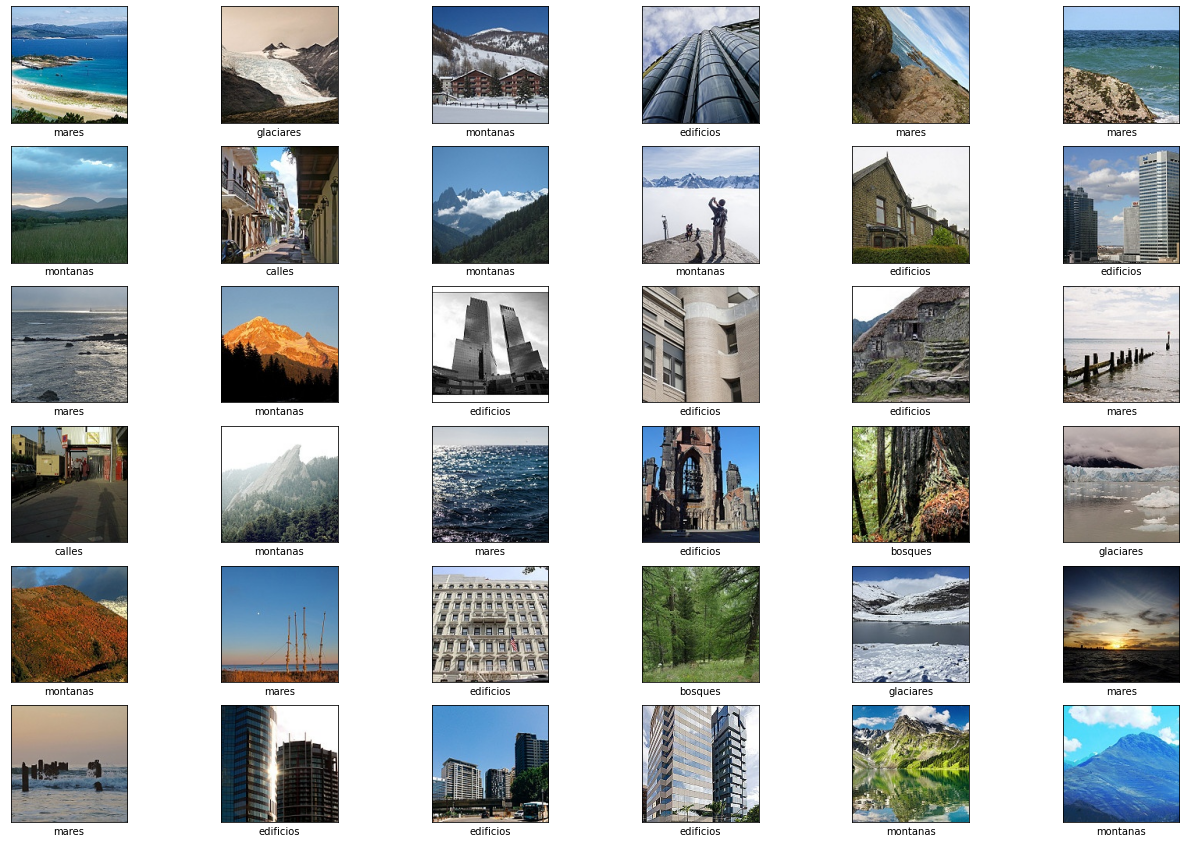

In [17]:
fig = plt.figure(figsize=(22,15))

random.seed(RANDOM_SEED)
size_train = len(dataframes["train"])

for i in range(36):
    rdn_row = random.randint(0, size_train)
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(dataframes["train"]["img"].iloc[rdn_row])
    plt.xlabel(list(classes.keys())[dataframes["train"]["classification"].iloc[rdn_row]])
plt.show()

In [31]:
need_resize = 0

for i in range (size_train):
    if (dataframes["train"]["img"].iloc[i].shape[0] != 150 or dataframes["train"]["img"].iloc[i].shape[1] != 150):
        print(f"Image {i} size is {dataframes['train']['img'].iloc[i].shape}")
        need_resize += 1
print()
print(f"{need_resize} images need a resize")

Image 5 size is (113, 150, 3)
Image 292 size is (108, 150, 3)
Image 565 size is (133, 150, 3)
Image 598 size is (115, 150, 3)
Image 753 size is (135, 150, 3)
Image 1691 size is (136, 150, 3)
Image 1708 size is (108, 150, 3)
Image 1900 size is (113, 150, 3)
Image 2782 size is (113, 150, 3)
Image 6290 size is (124, 150, 3)
Image 6857 size is (110, 150, 3)
Image 7006 size is (105, 150, 3)
Image 7213 size is (111, 150, 3)
Image 7258 size is (120, 150, 3)
Image 7543 size is (149, 150, 3)
Image 7732 size is (143, 150, 3)
Image 7763 size is (146, 150, 3)
Image 7846 size is (134, 150, 3)
Image 7865 size is (142, 150, 3)
Image 7875 size is (123, 150, 3)
Image 7881 size is (119, 150, 3)
Image 7938 size is (102, 150, 3)
Image 8294 size is (76, 150, 3)
Image 8328 size is (97, 150, 3)
Image 8606 size is (111, 150, 3)
Image 8917 size is (111, 150, 3)
Image 8931 size is (135, 150, 3)
Image 10413 size is (113, 150, 3)
Image 10666 size is (113, 150, 3)
Image 10682 size is (140, 150, 3)
Image 10969 size

In [32]:
# TODO: implementar la función para generalizar para train y test
